In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier

In [4]:
df = pd.read_csv('weather_data.csv')

In [5]:
df.head()

,Outlook,Temperature,Humidity,Wind,Play
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rain,Cool,Normal,Weak,Yes
4,Rain,Cool,Normal,Strong,No


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Outlook      14 non-null     object
 1   Temperature  14 non-null     object
 2   Humidity     14 non-null     object
 3   Wind         14 non-null     object
 4   Play         14 non-null     object
dtypes: object(5)
memory usage: 688.0+ bytes


In [7]:
df.isnull().sum()

Outlook        0
Temperature    0
Humidity       0
Wind           0
Play           0
dtype: int64

In [8]:
df.describe()

,Outlook,Temperature,Humidity,Wind,Play
count,14,14,14,14,14
unique,3,3,2,2,2
top,Rain,Mild,High,Weak,Yes
freq,5,6,7,8,9


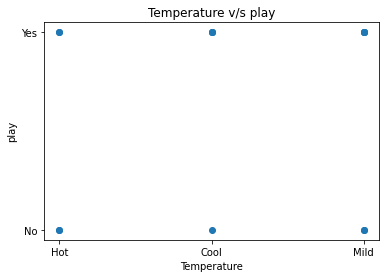

In [14]:
plt.scatter(df.Temperature,df.Play)
plt.xlabel("Temperature")
plt.ylabel("play")
plt.title("Temperature v/s play")
plt.show()

In [24]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [26]:
x

,Outlook,Temperature,Humidity,Wind
0,Sunny,Hot,High,Weak
1,Sunny,Hot,High,Strong
2,Overcast,Hot,High,Weak
3,Rain,Cool,Normal,Weak
4,Rain,Cool,Normal,Strong
5,Sunny,Mild,High,Weak
6,Sunny,Cool,Normal,Weak
7,Rain,Mild,Normal,Weak
8,Sunny,Mild,Normal,Strong
9,Overcast,Mild,High,Strong


In [27]:
y

array(['No', 'No', 'Yes', 'Yes', 'No', 'No', 'Yes', 'Yes', 'Yes', 'Yes',
       'Yes', 'No', 'Yes', 'Yes'], dtype=object)

In [28]:
from sklearn.preprocessing import LabelEncoder
l_x = LabelEncoder()
x = x.apply(LabelEncoder().fit_transform)

In [29]:
x

,Outlook,Temperature,Humidity,Wind
0,2,1,0,1
1,2,1,0,0
2,0,1,0,1
3,1,0,1,1
4,1,0,1,0
5,2,2,0,1
6,2,0,1,1
7,1,2,1,1
8,2,2,1,0
9,0,2,0,0


In [32]:
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 8)
regressor = DecisionTreeClassifier()
regressor.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [33]:
y_pred = regressor.predict(x_test)

In [34]:
y_pred

array(['Yes', 'Yes', 'Yes'], dtype=object)

In [35]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
cm

array([[3]])

In [36]:
accuracy_score(y_test, y_pred) 

1.0

In [37]:
from sklearn.metrics import classification_report
cr = classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

         Yes       1.00      1.00      1.00         3

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3

